In [ ]:
#confusion matrix - modelo 1
import numpy as np
X = np.array([.50,1.50,2.00,4.25,3.25,5.50], ndmin=2).reshape((6,1))
y = np.array([0,0,0,1,1,1])
X_mean = np.mean(X)
y_mean = np.mean(y)
n = len(X)
class LogisticRegression:
    b0 = 0
    b1 = 0
    y_pred = np.array([])
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    def fit(self, X, y):
        upward_function = 0
        downward_function = 0
        for i in range(n):
            upward_function += (X[i]-X_mean)*(y[i]-y_mean)
            downward_function += (X[i]-X_mean)**2
        self.b1 = upward_function / downward_function
        self.b0 = y_mean - (self.b1*X_mean)
        return self.b0, self.b1
    
    def predict(self, Xi):
        z = self.b0 + (self.b1*Xi)
        sigmoid = 1/(1 + np.exp(-z))
        for i in range(n):
            if sigmoid[i] >= 0.5:
                self.y_pred = np.append(self.y_pred, [1])
            else:
                self.y_pred = np.append(self.y_pred, [0])
        return sigmoid, self.y_pred
    
    def confusion_matrix(self):
        for i in range(n):
            if y[i]==1 and self.y_pred[i]==1:
                self.true_positives += 1
            if y[i]==0 and self.y_pred[i]==0:
                self.true_negatives += 1
            if y[i]==1 and self.y_pred[i]==0:
                self.false_negatives += 1
            if y[i]==0 and self.y_pred[i]==1:
                self.false_positives += 1
                
        matrix = np.array([self.true_positives, self.false_negatives, self.false_positives, self.true_negatives]).reshape((2,2))
        return matrix

model = LogisticRegression()
print(model.fit(X, y))


(array([-0.2409201]), array([0.26150121]))


In [ ]:
print(model.predict(X))


(array([[0.47248545],
       [0.53776089],
       [0.57005666],
       [0.70484142],
       [0.64770326],
       [0.76805063]]), array([0., 1., 1., 1., 1., 1.]))


In [ ]:
model.confusion_matrix()

array([[3, 0],
       [2, 1]])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(X, y)
y_pred = lr.predict(X)
y_pred

array([0, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[3, 0],
       [0, 3]])

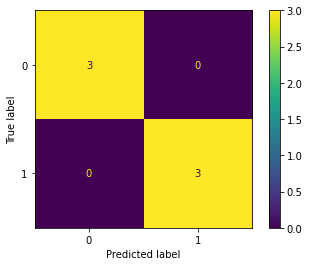

In [ ]:

from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plot_confusion_matrix(lr, X, y)
plt.show()

In [ ]:
# Confusion matrix - 2 modelo 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)
from seaborn import heatmap

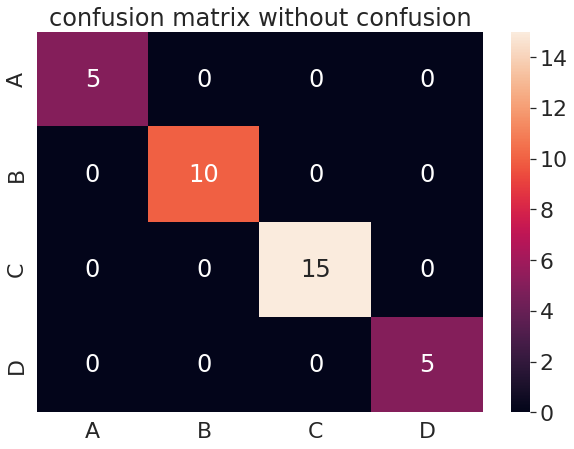

In [ ]:
# plotando a matrix de confusão 
array = [[5,0,0,0],  # when input was A, prediction was all A
         [0,10,0,0], # when input was B, prediction was all A
         [0,0,15,0], # when input was C, prediction was all A
         [0,0,0,5]]  # when input was D, prediction was all A
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (10,7))
plt.title('confusion matrix without confusion')
sns.heatmap(df_cm, annot=True)


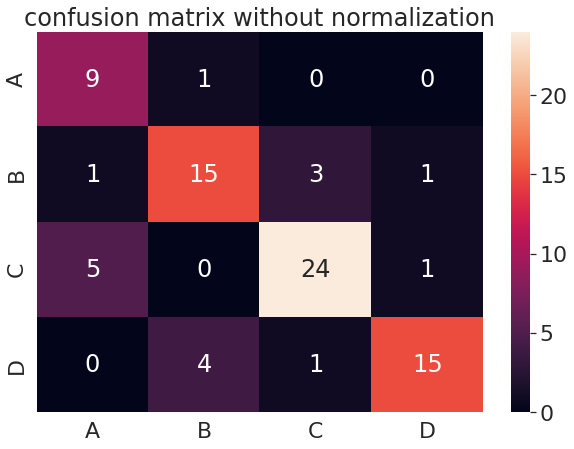

In [ ]:
# confusion matrix with confusion
array = [[9,1,0,0],  # when input was A, prediction was A for 9 times, B for 1 time 
         [1,15,3,1], # when input was B, prediction was A for 1 time, B for 15 times, C for 3 times
         [5,0,24,1], # when input was C, prediction was A for 5 times, C for 24 times, D for 1 time
         [0,4,1,15]] # when input was D, prediction was B for 4 times, C for 1 time, D for 15 timess

df_cm = pd.DataFrame(array, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (10,7))
plt.title('confusion matrix without normalization')
sns.heatmap(df_cm, annot=True)

In [ ]:
# confusion matrix with normalization
import numpy as np
from numpy import linalg as LA


In [ ]:
total = np.sum(array, axis = 1)
array = array / total[:,None]


In [ ]:
array

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

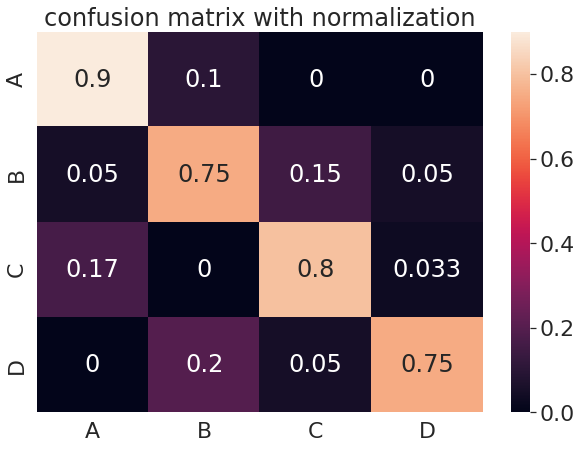

In [ ]:
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (10,7))
plt.title('confusion matrix with normalization')
sns.heatmap(df_cm, annot=True)


In [ ]:
import numpy as np
y_pred = np.zeros(10000)
y_test = np.zeros(10000)
ind1=np.random.randint(0,10000,300)
ind2=np.random.randint(0,10000,400)
ind3=np.random.randint(0,10000,500)
y_pred[ind1]= 1
y_test[ind2]=1
y_pred[ind3]= 1
y_test[ind3]=1

In [ ]:
np.sum(y_test)

856.0

In [ ]:
np.sum(y_pred)

780.0

In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score: ', accuracy_score(y_test,y_pred))

Accuracy Score:  0.937


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8867,  277],
       [ 353,  503]])

In [ ]:
from sklearn.metrics import classification_report
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      9144
         1.0       0.64      0.59      0.61       856

    accuracy                           0.94     10000
   macro avg       0.80      0.78      0.79     10000
weighted avg       0.93      0.94      0.94     10000



In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)

In [ ]:
precision

array([0.0856    , 0.64487179, 1.        ])

In [ ]:
recall

array([1.        , 0.58761682, 0.        ])

In [ ]:
thresholds

array([0., 1.])